In [ ]:
#Installation of required libraries
#python -m pip install pandas
#python -m pip install scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore")

In [4]:
#Read the dataset
df = pd.read_csv(r'D:\Download\diabetesdataset.csv')

In [5]:
#First 5 observation units of dataset accessed
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


EXPLORATORY DATA ANALYSIS

In [6]:
#Size of the dataset were examined
df.shape

(768, 9)

In [7]:
#feature Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Missing value were filled.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.pivot_table(index=['Outcome'] )

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,31.190000,30.304200,68.184000,0.429734,109.980000,68.792000,3.298000,19.664000
1,37.067164,35.142537,70.824627,0.550500,141.257463,100.335821,4.865672,22.164179


In [10]:
#Descriptive statistics of the data set accessed.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# The distribution of the Outcome variable was examined.
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [12]:
# The classes of the outcome variable were examined.
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

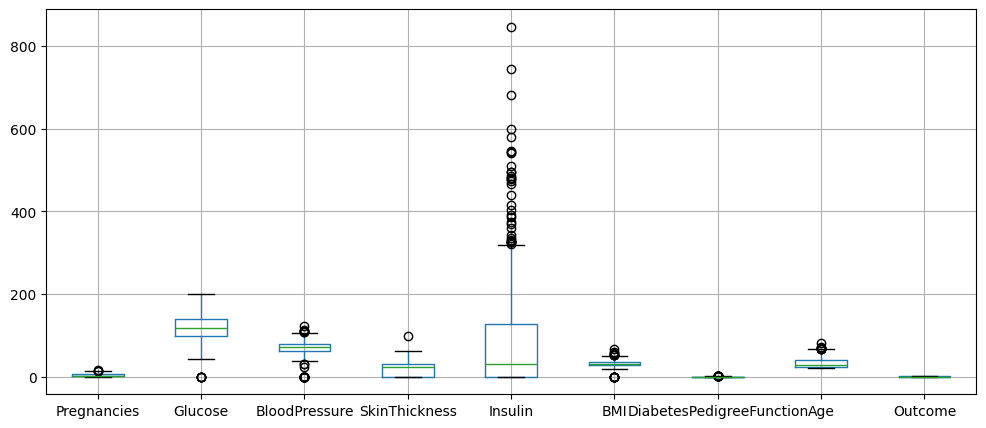

In [18]:
# Outlier observation analysis
df.boxplot(figsize=(12,5))
plt.show()

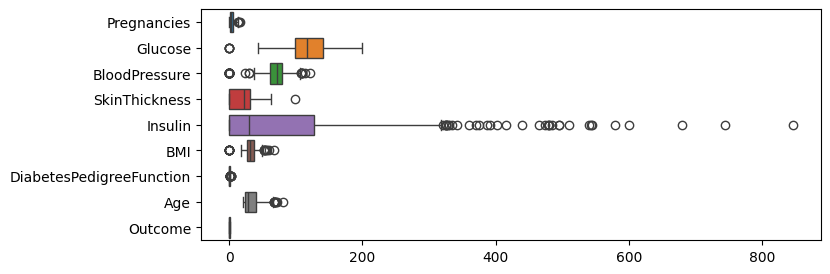

In [21]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df,orient='h')
plt.show()

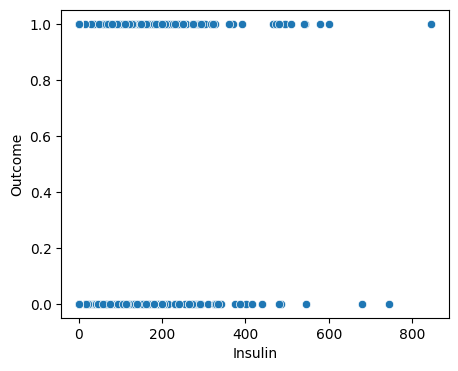

In [22]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['Insulin'],y=df['Outcome'])
plt.show()

REPLACING 0 WITH MEAN WITH RESPECTIVE COLUMNS

In [23]:
X=df.drop('Outcome',axis=1)

In [24]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [25]:
Y=df['Outcome']

In [26]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [27]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [28]:
X.replace(to_replace=0,value=X.mean(),inplace=True)

In [29]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


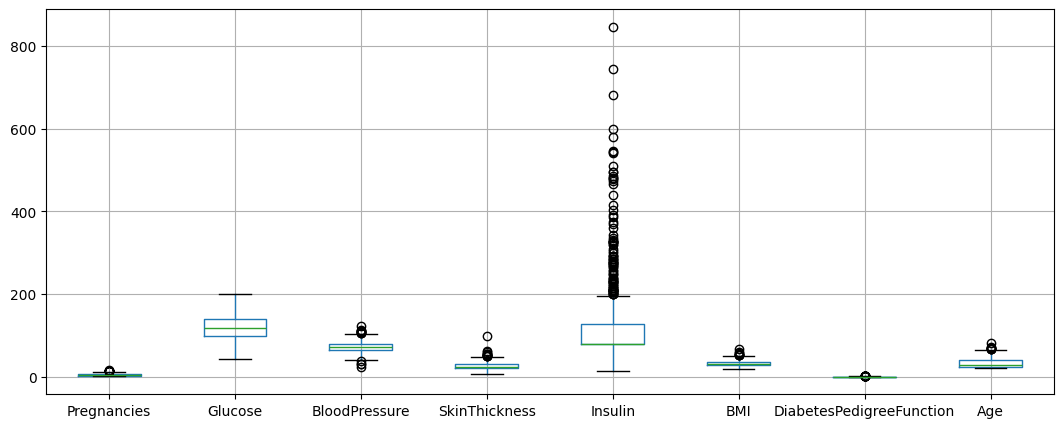

In [30]:
#used here matplotlib
X.boxplot(figsize=(13,5))
plt.show()

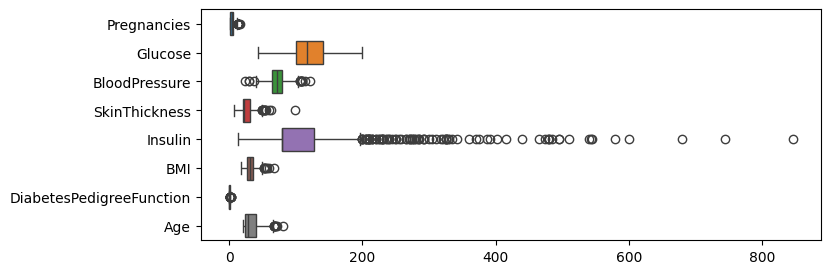

In [32]:
#used here seaborn
plt.figure(figsize=(8,3))
sns.boxplot(data=X,orient='h')
plt.show()

SPLITTING OF DATA FOR TRAINING AND TESTING IN THE RATIO OF 75:25

In [33]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [34]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [37]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
341,1.000000,95.000000,74.0,21.000000,73.000000,25.9,0.673,36
146,9.000000,57.000000,80.0,37.000000,79.799479,32.8,0.096,41
372,3.845052,84.000000,64.0,22.000000,66.000000,35.8,0.545,21
204,6.000000,103.000000,72.0,32.000000,190.000000,37.7,0.324,55
450,1.000000,82.000000,64.0,13.000000,95.000000,21.2,0.415,23
...,...,...,...,...,...,...,...,...
75,1.000000,120.894531,48.0,20.000000,79.799479,24.7,0.140,22
599,1.000000,109.000000,38.0,18.000000,120.000000,23.1,0.407,26
575,1.000000,119.000000,44.0,47.000000,63.000000,35.5,0.280,25
337,5.000000,115.000000,76.0,20.536458,79.799479,31.2,0.343,44


In [38]:
Y_train

341    0
146    0
372    0
204    0
450    0
      ..
75     0
599    0
575    0
337    1
523    1
Name: Outcome, Length: 576, dtype: int64

In [39]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47
748,3.000000,187.0,70.0,22.000000,200.000000,36.4,0.408,36
42,7.000000,106.0,92.0,18.000000,79.799479,22.7,0.235,48
485,3.845052,135.0,68.0,42.000000,250.000000,42.3,0.365,24
543,4.000000,84.0,90.0,23.000000,56.000000,39.5,0.159,25
...,...,...,...,...,...,...,...,...
593,2.000000,82.0,52.0,22.000000,115.000000,28.5,1.699,25
335,3.845052,165.0,76.0,43.000000,255.000000,47.9,0.259,26
473,7.000000,136.0,90.0,20.536458,79.799479,29.9,0.210,50
130,4.000000,173.0,70.0,14.000000,168.000000,29.7,0.361,33


In [40]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
593    0
335    0
473    0
130    1
48     1
Name: Outcome, Length: 192, dtype: int64

STANDARD SCALER

In [41]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [42]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [43]:
X_train_std

array([[-1.15569536, -0.87560446,  0.14113892, ..., -0.94687861,
         0.63088494,  0.22975102],
       [ 1.58691234, -2.13618689,  0.64283313, ...,  0.04373097,
        -1.20512382,  0.64880292],
       [-0.18033764, -1.2405099 , -0.69501809, ...,  0.47443079,
         0.22359011, -1.02740468],
       ...,
       [-1.15569536, -0.07944714, -2.36733211, ...,  0.43136081,
        -0.61963749, -0.69216316],
       [ 0.21560849, -0.21214003,  0.30837032, ..., -0.18597559,
        -0.41917206,  0.90023407],
       [ 1.58691234,  0.2854583 , -0.19332388, ...,  0.24472422,
         0.56406313,  0.98404445]])

TRAIN OUR MODEL
LOGISTIC REGRESSION

In [44]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [45]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [46]:
Y_pred=lr.predict(X_test_std)

In [47]:
Y_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [48]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
593    0
335    0
473    0
130    1
48     1
Name: Outcome, Length: 192, dtype: int64

In [49]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47
748,3.000000,187.0,70.0,22.000000,200.000000,36.4,0.408,36
42,7.000000,106.0,92.0,18.000000,79.799479,22.7,0.235,48
485,3.845052,135.0,68.0,42.000000,250.000000,42.3,0.365,24
543,4.000000,84.0,90.0,23.000000,56.000000,39.5,0.159,25
...,...,...,...,...,...,...,...,...
593,2.000000,82.0,52.0,22.000000,115.000000,28.5,1.699,25
335,3.845052,165.0,76.0,43.000000,255.000000,47.9,0.259,26
473,7.000000,136.0,90.0,20.536458,79.799479,29.9,0.210,50
130,4.000000,173.0,70.0,14.000000,168.000000,29.7,0.361,33


In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(Y_test,Y_pred) * 100

79.16666666666666

In [52]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)



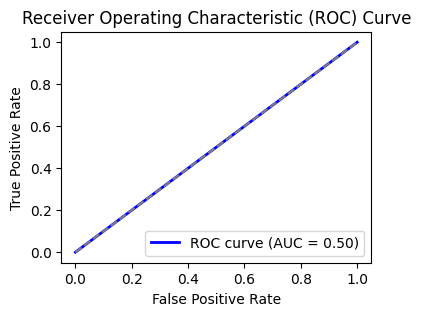

In [53]:
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

DECISION TREE

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


In [55]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [56]:
Y_pred=dt.predict(X_test_std)

In [57]:
Y_pred

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [58]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
593    0
335    0
473    0
130    1
48     1
Name: Outcome, Length: 192, dtype: int64

In [59]:
accuracy_score(Y_test,Y_pred)*100

71.875

In [60]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
Y_pred = dt.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, Y_pred)

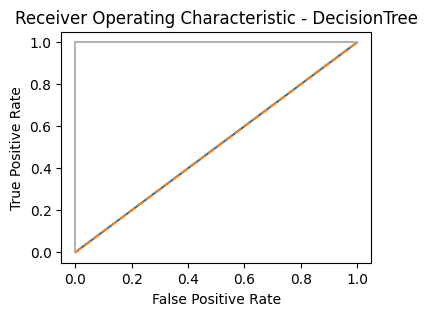

In [61]:
plt.subplots(1, figsize=(4,3))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest 

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [63]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [64]:
Y_pred = rf.predict(X_test_std)

In [65]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
Y_test

766    1
748    1
42     0
485    1
543    0
      ..
593    0
335    0
473    0
130    1
48     1
Name: Outcome, Length: 192, dtype: int64

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)*100

64.58333333333334

In [68]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

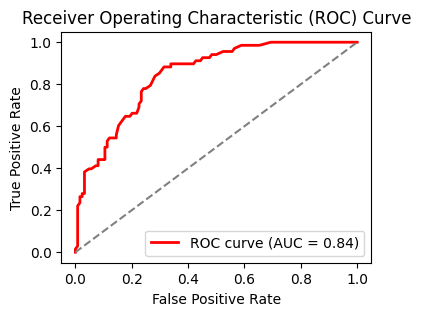

In [69]:
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()